<a href="https://colab.research.google.com/github/bkn872/computer_vision/blob/main/AIML_MENTOR_DEMO_DECK_BOOSTING_CASE_STUDY_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
![alt text](GL_Logo.png "Title")
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
 
## IMAGE CLASSFIER USING FASHION IMAGES

#### Author: KRISHNAV DAVE | AIML ACAD OPS TEAM 

#### Date: AUGUST 2020

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

## Case study problem statement:  

Build and delpoy an image classfier using BOOSTING algorithm

### Input data details

Fashion (fashion_mnist) dataset from Keras comes preloaded with  train and test images along with the labels.


Number of images = 70000 
    1. Training images = 60000
    2. Testig images = 10000
    3. Image size = 28 x 28
    4. Channel = 1

Labels: 

    0. T-shirt/top
    1. Trouser
    2. Pullover
    3. Dress
    4. Coat
    5. Sandal
    6. Shirt
    7. Sneaker
    8. Bag
    9. Ankle boot

### Expected output details: 

1. SVM based image classifier
2. Web or UI based deployment for SVM classifier

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
#from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

## Case study approach:

#### Step 1: Universal Library and Package declaration

#### Step 2: Import data to python

#### Step 3: Clean, prepare and validate data 

#### Step 4: Inferential Statistics

#### Step 5: Exploratory Data Analysis

#### Step 6: Data Preprocessing for Model Implementation

#### Step 7: Model Design Tuning and Testing

#### Step 8: Model pickling

#### Step 9: Model deployment ( Web or UI )

#### Step 10: Conclusion

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

### Step 1: Universal Library and Package declaration

In [ ]:
from keras.layers.embeddings import Embedding
import tensorflow as tf
import keras 

In [ ]:
tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

### Step 2: Import data to python

In [ ]:
# Load fashion MNIST dataset
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data() 

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Label: 4


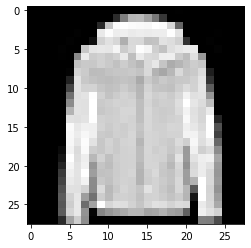

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[5000])) # by changing the number we can See the pictures 
plt.imshow(X_train[5000], cmap='gray')# here also we can change the umber 

### Step 3: Clean, prepare and validate data 

In [ ]:
# to reshape the all images in one similar shape

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
#Change the Type of data 

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [ ]:
print("X_train shape:", X_train.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])
print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())

X_train shape: (60000, 28, 28, 1)
Images in X_train: 60000
Images in X_test: 10000
Max value in X_train: 1.0
Min value in X_train: 0.0


One-hot encode the class vector

convert class vectors (integers) to binary class matrix


convert y_train and y_test

number of classes: 10

we are doing this to use categorical_crossentropy as loss

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (60000, 10)
One value of y_train: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Initialize a sequential model again

In [ ]:
from tensorflow.keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

### Step 4: Inferential Statistics

### Step 5: Exploratory Data Analysis

### Step 6: Data Preprocessing for Model Implementation

In [ ]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
model.fit( x=X_train, y=y_train, batch_size=32, epochs=10, validation_split = 0.3)

Epoch 1/10
1313/1313 [==============================] - 97s 73ms/step - loss: 0.4015 - accuracy: 0.8564 - val_loss: 0.3038 - val_accuracy: 0.8903
Epoch 2/10
1313/1313 [==============================] - 95s 72ms/step - loss: 0.2528 - accuracy: 0.9057 - val_loss: 0.2654 - val_accuracy: 0.9035
Epoch 3/10
1313/1313 [==============================] - 93s 71ms/step - loss: 0.1822 - accuracy: 0.9328 - val_loss: 0.2657 - val_accuracy: 0.9083
Epoch 4/10
1313/1313 [==============================] - 92s 70ms/step - loss: 0.1308 - accuracy: 0.9521 - val_loss: 0.2653 - val_accuracy: 0.9148
Epoch 5/10
1313/1313 [==============================] - 91s 69ms/step - loss: 0.0900 - accuracy: 0.9664 - val_loss: 0.3107 - val_accuracy: 0.9119
Epoch 6/10
1313/1313 [==============================] - 93s 71ms/step - loss: 0.0590 - accuracy: 0.9781 - val_loss: 0.3592 - val_accuracy: 0.9110
Epoch 7/10
1313/1313 [==============================] - 92s 70ms/step - loss: 0.0402 - accuracy: 0.9854 - val_loss: 0.3770 -

### Step 7: Model Design Tuning and Testing

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.5597 - accuracy: 0.9049


[0.5596818327903748, 0.9049000144004822]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D

# Initialize the model
model = Sequential()

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))

# Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

# Apply Dropout with 0.2 probability 
model.add(Dropout(rate=0.2))

# Flatten the layer
model.add(Flatten())

# Add Fully Connected Layer with 128 units and activation function as 'relu'
model.add(Dense(128, activation="relu"))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(10, activation="softmax"))

In [ ]:
import tensorflow
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Use earlystopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

# Fit the model
model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 110s 59ms/step - loss: 0.3896 - accuracy: 0.8596 - val_loss: 0.2954 - val_accuracy: 0.8894
Epoch 2/10
1875/1875 [==============================] - 106s 56ms/step - loss: 0.2529 - accuracy: 0.9077 - val_loss: 0.2551 - val_accuracy: 0.9045
Epoch 3/10
1875/1875 [==============================] - 106s 57ms/step - loss: 0.2032 - accuracy: 0.9236 - val_loss: 0.2342 - val_accuracy: 0.9150
Epoch 4/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.1680 - accuracy: 0.9365 - val_loss: 0.2480 - val_accuracy: 0.9122
Epoch 5/10
1875/1875 [==============================] - 106s 56ms/step - loss: 0.1429 - accuracy: 0.9458 - val_loss: 0.2231 - val_accuracy: 0.9237


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.2231 - accuracy: 0.9237


[0.22309955954551697, 0.9236999750137329]

Predicted label: 3
Softmax Outputs: [[1.3658898e-06 2.7958603e-07 1.4669111e-08 9.9998617e-01 3.6196687e-07
  6.7100196e-08 8.3623108e-06 8.5853313e-10 3.2887019e-06 4.4100394e-09]]
0.99999994


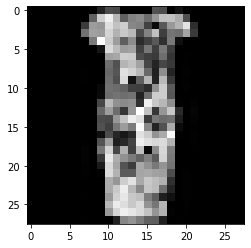

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_test[100].reshape(28, 28), cmap='gray')
y_pred = model.predict(X_test[100].reshape(1, 28, 28, 1))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Predicted label: 1
Softmax Outputs: [[3.4267831e-09 1.0000000e+00 4.5381932e-12 8.8522556e-10 1.0178012e-08
  6.4071022e-14 7.8849427e-11 2.7345808e-14 3.4283076e-12 5.5416869e-12]]
1.0


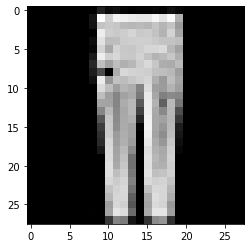

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_test[200].reshape(28, 28), cmap='gray')
y_pred = model.predict(X_test[200].reshape(1, 28, 28, 1))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

### Step 8: Model pickling

### Step 9: Model deployment  ( Web or UI )

### Step 10: Conclusion

     ©Great Learning. Proprietary content. All Rights Reserved. Unauthorised use or distribution prohibited